This is part 2 of my effort following the pandas to SQL tutorial by Greg Reda
http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## Administrative setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns',100)
%matplotlib inline
import seaborn
# Set seaborn aesthetic parameters to defaults - just to make plots stand out!
seaborn.set()

## Introducting the movielens dataset

A very cool dataset comprising of 100,000 ratings made by 943 users on 1,682 movies.

I've downloaded the movielens dataset from <a href="http://grouplens.org/datasets/movielens/">here</a>. The folder ml-100k has a README  that has descriptions for most of the files we will use.

### Ingesting the data

In [3]:
# ingesting the users dataset. firstly, i got an idea about the columns from the readme. 
u_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_csv('~/Downloads/ml-100k/u.user',sep = '|', names=u_cols)
users.head(3)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [4]:
# the movies file contains columns indicating the movie's genres
# now, the readme reveals that the first 5 columns of this dataset are descriptors
# and the remaining columns are feature variables for each genre. Let's keep the first 3
# feature variables for kicks but drop the rest. I don't want to clutter the dataset visually.
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','Unknown',
          'Action','Adventure']
movies = pd.read_csv('~/Downloads/ml-100k/u.item', sep='|', names=m_cols, usecols = range(8))
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0


Note that I had to use the parameter "usecols" and limit the dataset extraction to only the first 8 columns. This is the only case where simply specifying the "names" parameter isn't sufficient. If we don't specify usecols, then the column names apply to the last 8 columns only. Makes sense when you think about it, doesn't it? Data is read from the file first and then names needs to be applied in the order of doing things.

In [5]:
# similarly for ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('~/Downloads/ml-100k/u.data', sep='\t', names=r_cols)
ratings.head(3)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


### Inspecting the dataset

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 8 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
Unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 118.3+ KB


In [7]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
Unknown                 int64
Action                  int64
Adventure               int64
dtype: object

In [8]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


You can slice the dataset in any way you want, like so - 

In [9]:
movies[20:23]

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...,0,1,0
22,23,Taxi Driver (1976),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Taxi%20Driver...,0,0,0


The info method can be used to glance into the dataset as a combination of head and tail, by simply not putting the (), like so - 

In [10]:
ratings.info

<bound method DataFrame.info of        user_id  movie_id  rating  unix_timestamp
0          196       242       3       881250949
1          186       302       3       891717742
2           22       377       1       878887116
3          244        51       2       880606923
4          166       346       1       886397596
5          298       474       4       884182806
6          115       265       2       881171488
7          253       465       5       891628467
8          305       451       3       886324817
9            6        86       3       883603013
10          62       257       2       879372434
11         286      1014       5       879781125
12         200       222       5       876042340
13         210        40       3       891035994
14         224        29       3       888104457
15         303       785       3       879485318
16         122       387       5       879270459
17         194       274       2       879539794
18         291      1042       4     

### Selecting information from the dataset

In [11]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [12]:
users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

Multiple columns can be selected, and even passed into a variable for other operations

In [13]:
print users[['age','occupation']].head()
print '\n'

# can also store into variable for use later
columns_for_use = ['age','occupation']
print users[columns_for_use].head()

   age  occupation
0   24  technician
1   53       other
2   23      writer
3   24  technician
4   33       other


   age  occupation
0   24  technician
1   53       other
2   23      writer
3   24  technician
4   33       other


Notice that i used [[ and ]] in the former command, but only single [ and ] when using the columns_for_use variable. A double bracket signifies a list of a list.

Row selection is like subsetting

In [14]:
# users older than 25
print users[users['age'] > 25].head(3)
print '\n'

# users aged 40 and male
print users[(users['age'] == 40) & (users['gender'] == 'M')].head(3)
print '\n'

# users younger than 30 OR female
print users[(users['age'] < 30) | (users['gender'] == 'F')].head(3)

   user_id  age gender occupation zip_code
1        2   53      F      other    94043
4        5   33      F      other    15213
5        6   42      M  executive    98101


     user_id  age gender  occupation zip_code
18        19   40      M   librarian    02138
82        83   40      M       other    44133
115      116   40      M  healthcare    97232


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067


One learning for me was that if 2 conditions are being evaluated simultaneously, then it needs to be enclosed within round brackets. Otherwise the interpreter considers the entire expression together, which is meaningless.

Note that the index on the users dataset above is meaningless. Let's check if the user id is indeed unique

In [15]:
print len(users['user_id'])
print len(users['user_id'].unique())

943
943


So we can set user_id as a unique index. Setting it inplace.

In [16]:
print users.head(3)
print '\n'

users.set_index('user_id', inplace = True)
print users.head(3)

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067


         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067


Notice that we have lost the pandas default index. We can select rows based on the index. This has applications when you think of non-numeric indices

Similarly you can use the following command to get the old pandas default index.

<b>users.reset_index(inplace = True)

In [17]:
print users.ix[[1,50,300]]

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
50        21      M      writer    52245
300       26      F  programmer    55106


Mind you, you can select numeric indices using the ":" operator like we saw in the subsetting example. But for some reason, you can't select indices as a list of a list. You get an indices out of bound error. Interesting to note that the lower bound needs to be 1 value lower than the number you want. So, specify lower bound as 0 if you want user_id 1.

In [18]:
print users[0:5]

         age gender  occupation zip_code
user_id                                 
1         24      M  technician    85711
2         53      F       other    94043
3         23      M      writer    32067
4         24      M  technician    43537
5         33      F       other    15213


In [19]:
print users[[1,2,3,4,5]]

IndexError: indices are out-of-bounds

### Merging all these 3 datasets into one movielens dataset

In [20]:
movielens = pd.merge(movies, ratings)
# turns out that i had converted the user_id column of the users table into the index
movielens = pd.merge(movielens, users, left_on='user_id', right_index=True)
movielens.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,308,4,887736532,60,M,retired,95076
681,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,308,5,887737890,60,M,retired,95076
889,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,308,4,887739608,60,M,retired,95076


### What are the 25 most rated movies?

In [21]:
movielens.groupby(by='title').rating.size().sort_values(ascending = False)[:25]

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

Another way to achieve this since the dataset is at a movie-rating level is to use the "value_counts" method. 

In [31]:
movielens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

### Which movies are most highly rated?

In [32]:
movielens.groupby(by = 'title').rating.mean().sort_values(ascending = False)[:25]

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

There are a lot of movies with perfect 5 rating or a suspicious 4.5 ..<br/>
Overall, these ratings make me suspicious of simply using the mean rating without having a context of the sample size of these ratings. For this, let's use the agg function

In [33]:
highly_rated = movielens.groupby(by = 'title').agg({'rating':[np.size,np.mean]})
highly_rated.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

AGG method can be used as a dictionary to pass the columns that we want aggregation on as the key and a list of functions that we want applied.

In [34]:
highly_rated.sort_values(by = [('rating','mean')], ascending = False)[:25]

rating          
                                                     size      mean
title                                                              
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Someone Else's America (1995)                           1  5.000000
Star Kid (1997)                                         3  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Aiqing wansui (1994)                                    1  5.000000
Santa with Muscles (1996)                               2  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000

Note the sort index ('rating','mean'). This is because the dataframe is now multi-index. So we need to pass a tuple as the sort index.

As expected, the movies with rating of 5 have very low sample sizes. Let's specify sample sizes of at least 100.

In [35]:
highly_rated[highly_rated[('rating','size')] >= 100].sort_values(by = [('rating','mean')], ascending = False)[:25]
# this can also be specified as:
# highly_rated[highly_rated['rating']['size'] >= 100].sort_values(by = [('rating','mean')], ascending = False)[:25]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360

The SQL equivalent for this would be

SELECT title, COUNT(1) size, AVG(rating) as mean<br/>
FROM highly_rated<br/>
GROUP BY title<br/>
HAVING COUNT(1) >= 100<br/>
ORDER BY 3 DESC<br/>
LIMIT 25

#### Limiting population to the 50 most rated movies

In [73]:
mostrated = movielens.groupby(by = 'movie_id').rating.size().sort_values(ascending = False)[:50]
mostrated.head(3)

movie_id
50     583
258    509
100    508
dtype: int64

We can use this series in an EXISTS, IN or JOIN scenario whenever we want to filter our results. Just an example using EXISTS -

Select * <br/>
from movielens<br/>
where exists (Select 1 from mostrated where movielens.movie_id = mostrated.movie_id);

### Which movies are most wildly different amongst different ages?

Pandas natively integrates into matpplotlib. This is why we can simply call the hist function on the dataframe.

We defined matplotlib.pyplot while instantiating the libraries in order to customise the graphs a bit (ex: axes, titles etc.)

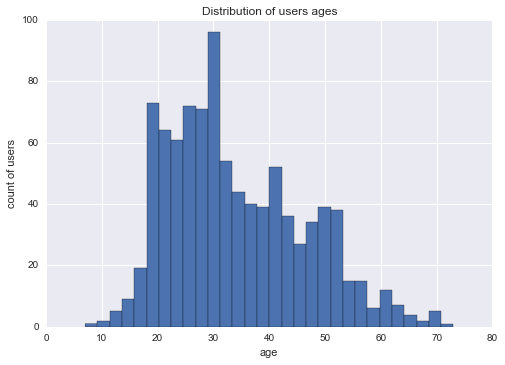

In [37]:
users.age.hist(bins = 30)
plt.title('Distribution of users ages')
plt.ylabel('count of users')
plt.xlabel('age');

In most real cases, the bins need to make more sense. for example, consumers between ages 0 to 14 can be clubbed under the 'children' category, while we may be more interested in the difference in buying patterns between a 22 year old and a 28 year old, so we create 2 separate categories for 20-25 and 25-30. Typically, custom bins in SQL can be created using a case statement - 

Select user_id, age,<br/>
case when age <= 14 then '0 - 14'<br/>
when age >= 15 and age < 20 then '15 - 19'<br/>
when age >= 20 and age < 25 then '20 - 24'<br/>
when age >= 25 and age < 30 then '20 - 29'<br/>
else 'Great than 30' end as age_group<br/>
from users

Pandas has an inbuilt function to slice and dice the data. It's called 'cut'. And it does just that.

In [38]:
labels = ['0-14','14-19','20-24','25-29','Greater than 30']
movielens['age_group'] = pd.cut(movielens.age,[0,15,20,25,30,80],right = False,labels = labels)
movielens[['age','age_group']].drop_duplicates().head(10)

,age,age_group
0,60,Greater than 30
1,21,20-24
2,33,Greater than 30
3,30,Greater than 30
4,23,20-24
6,29,25-29
7,26,25-29
8,31,Greater than 30
9,24,20-24
10,32,Greater than 30


3 points here
- right = False condition tells the function not consider the rightmost bin value i.e. in the above example, it will consider 0 - 14.
- the series specified as [0,15,20,25,30,80] defines the bins. In conjunction with right=False, this series tells the function to cut the age variable as 0-14, 15-19, 20-24 and so on.
- if the bin parameter is a scalar, then it cuts the variable into equal sized partitions.

Now, let's get back to the dataset and cut it into 8 parts of size 10 each.

In [39]:
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age,range(0,81,10),right = False,labels = labels)
movielens[['age','age_group']].drop_duplicates().head(10)

,age,age_group
0,60,60-69
1,21,20-29
2,33,30-39
3,30,30-39
4,23,20-29
6,29,20-29
7,26,20-29
8,31,30-39
9,24,20-29
10,32,30-39


Note the range is 81 because it doesn't include the max range (think why!). So, if we specify np.arange(0,80,10), then the output will be - 

array([ 0, 10, 20, 30, 40, 50, 60, 70])

The histogram above clearly shows users above the age of 70.

Now, let's compare ratings across different age groups.

In [40]:
movielens.groupby(by = 'age_group').agg({'rating':[np.size,np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

#### Let's look at how the 50 most rated movies are viewed across each age group. We can use the mostrated Series we created earlier for filtering.

In [60]:
movielens.head(3)

,title,index,release_date,video_release_date,imdb_url,Unknown,Action,Adventure,user_id,rating,unix_timestamp,age,gender,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),1,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),2,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,308,4,887739608,60,M,retired,95076,60-69


In [75]:
movielens.set_index('movie_id',inplace = True)

In [76]:
mostrated.index

Int64Index([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121, 174, 127,  56,
              7,  98, 237, 117, 172, 222, 313, 204, 405,  79, 210, 151, 173,
             69, 168, 748, 269, 257, 195, 423,   9, 318, 276, 302,  22,  96,
            328,  25,  15, 118, 183, 216, 176,  64, 234, 202,  28],
           dtype='int64', name=u'movie_id')

In [91]:
by_age = movielens.ix[mostrated.index].groupby(['title','age_group'])

In [92]:
by_age.rating.mean().head(20)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
                      20-29        4.087719
                      30-39        3.887640
                      40-49        3.526316
                      50-59        4.235294
                      60-69        3.800000
Name: rating, dtype: float64

#### you can imagine that for a list of 50 movies, this can produce a very long list. Will be good to pivot this and actually see it like a table

In [94]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


EXPLANATION: unstack pivots a multi-index along whichever level we specify (here we specified 1 which means the second index). How did we create this? Using the groupby clause on two fields- title and age_group. Conversely,

In [96]:
by_age.rating.mean().unstack(0).fillna(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),E.T. the Extra-Terrestrial (1982),"Empire Strikes Back, The (1980)","English Patient, The (1996)",Fargo (1996),Forrest Gump (1994),"Fugitive, The (1993)","Full Monty, The (1997)","Godfather, The (1972)",Groundhog Day (1993),Independence Day (ID4) (1996),Indiana Jones and the Last Crusade (1989),Jaws (1975),Jerry Maguire (1996),L.A. Confidential (1997),Leaving Las Vegas (1995),Liar Liar (1997),Men in Black (1997),Mission: Impossible (1996),Monty Python and the Holy Grail (1974),Mr. Holland's Opus (1995),"Princess Bride, The (1987)",Pulp Fiction (1994),Raiders of the Lost Ark (1981),Return of the Jedi (1983),"Rock, The (1996)","Saint, The (1997)",Schindler's List (1993),Scream (1996),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,3.954545,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,3.680000,4.642857,3.739130,3.937500,4.047619,4.320000,3.421053,4.400000,3.476190,3.595238,4.130435,3.863636,3.928571,4.363636,4.000000,3.191489,3.900000,3.441176,4.285714,3.814815,4.214286,4.031250,4.250000,4.488372,4.058824,3.342857,4.26087,3.784615,4.666667,4.095238,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,3.845455,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,3.609091,4.311688,3.571429,4.010471,3.785714,3.969925,4.056818,4.345070,3.798246,3.291429,3.944056,3.870000,3.793548,4.096154,3.773913,3.321244,3.705426,3.378378,4.154412,3.849057,4.335714,4.197605,4.269939,4.067308,3.690476,3.179688,4.46789,3.669767,4.585366,4.434211,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.064935,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,3.806818,4.052083,3.621849,4.230769,3.861702,3.981481,3.933333,4.412844,3.786667,3.389381,3.797619,3.648352,3.708333,4.089552,3.506024,3.080645,3.681818,3.180723,4.094737,3.693333,4.155556,4.074766,4.338983,3.805970,3.625000,3.068493,4.47561,3.250000,4.323944,4.214876,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,3.822222,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,4.160000,4.100000,3.634615,4.294118,3.847826,4.190476,3.714286,3.929412,3.851064,3.718750,3.980000,3.725000,3.407407,4.220000,3.568627,2.916667,3.625000,3.346154,3.717949,3.875000,3.878049,3.936170,4.173913,4.000000,3.673469,3.078431,4.50000,2.774194,4.378378,4.133333,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.187500,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,4.368421,3.909091,3.774648,4.442308,4.000000,4.240000,4.146341,4.463415,3.571429,3.888889,4.043478,3.956522,3.692308,4.261905,4.000000,3.000000,4.150000,3.125000,3.800000,3.551724,3.809524,3.500000,4.000000,4.000000,3.625000,2.750000,4.62963,3.000000,4.185185,4.300000,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857

### Which movies do men and women most disagree upon?

In SQL, you would do this something like:

Select title, avg(case when gender = 'F' then rating else null end) as female_rating, <br/>
avg(case when gender = 'M' then rating else null end) as male_rating <br/>
FROM movielens <br/>
group by title

#### Dataframe has a pivot_table method that is a lot more elegant

In [126]:
# remove index on movie_id from the previous question
#movielens.reset_index('movie_id', inplace = True)

# pivoting the dataset
pivoted = movielens.pivot_table(index = ['movie_id','title'],
                               columns = 'gender',
                               values = 'rating',
                               fill_value = 0)
pivoted.head(10)

,gender,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843
9,Dead Man Walking (1995),3.927711,3.884259


In [127]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head(5)

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [128]:
pivoted.reset_index('movie_id', inplace = True)

In [129]:
disagreements = pivoted[pivoted.movie_id.isin(mostrated.index)]['diff']
disagreements.head(5)

title
Toy Story (1995)             0.119994
Twelve Monkeys (1995)        0.300315
Dead Man Walking (1995)     -0.043452
Mr. Holland's Opus (1995)   -0.244160
Braveheart (1995)            0.031136
Name: diff, dtype: float64

Notice the use of isin. This seems to be a powerful dataframe construct.

/Users/Vivek/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


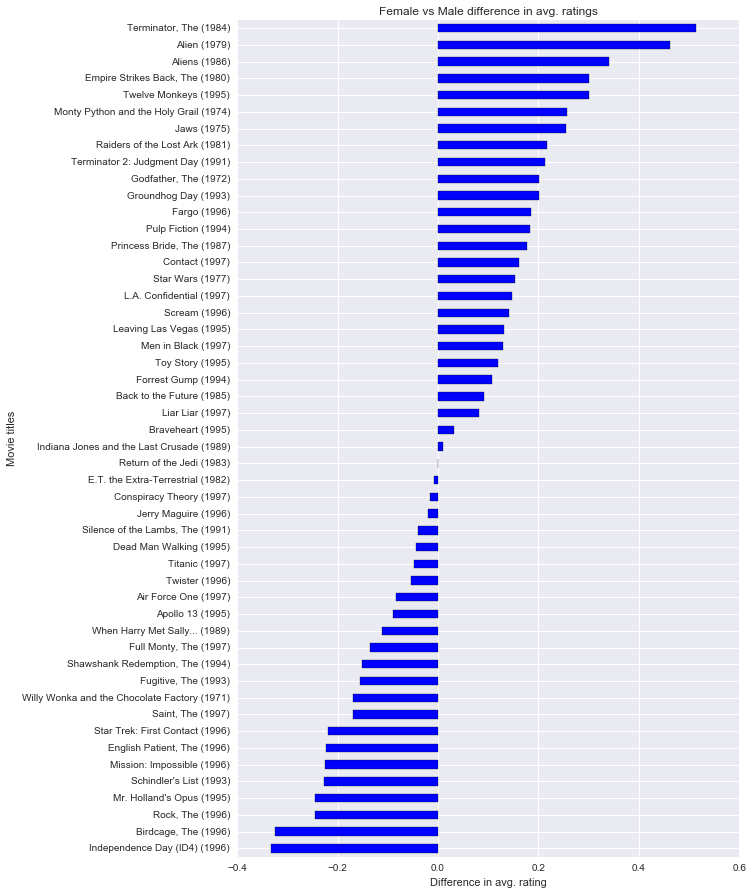

In [130]:
disagreements.order().plot(kind = 'barh',figsize = [9,15])
plt.title('Female vs Male difference in avg. ratings')
plt.ylabel('Movie titles')
plt.xlabel('Difference in avg. rating')